In [1]:
import pandas as pd #its library used for data sets for data manipulation
import matplotlib.pyplot as plt#matplotlib is used for data represenataion
import seaborn as sns#seaborn is also used for data visualization but it is advance then seaborn

In [2]:
#Loading all THree csv files.
customers=pd.read_csv("Customers.csv")
transactions=pd.read_csv("Transactions.csv")
products=pd.read_csv("Products.csv")

In [3]:
customers.head(3)  #.head() is used to view top 5 rows of the table

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [4]:
transactions.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [5]:
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [6]:
#merging the all three dataset based on similar columns 
customers = customers.merge(transactions, on="CustomerID", how="inner")
customers = customers.merge(products, on="ProductID", how="inner")

In [7]:
customers

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.90,57.30,SoundWave Cookbook,Books,57.30
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.90,57.30,SoundWave Cookbook,Books,57.30
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.90,57.30,SoundWave Cookbook,Books,57.30
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.90,57.30,SoundWave Cookbook,Books,57.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0125,Nicholas Taylor,North America,2022-12-18,T00266,P099,2024-02-27 18:25:58,2,708.58,354.29,SoundWave Mystery Book,Books,354.29
996,C0165,Juan Mcdaniel,South America,2022-04-09,T00672,P044,2024-07-28 00:09:49,4,75.28,18.82,ActiveWear Running Shoes,Clothing,18.82
997,C0165,Juan Mcdaniel,South America,2022-04-09,T00711,P044,2024-06-11 15:51:14,4,75.28,18.82,ActiveWear Running Shoes,Clothing,18.82
998,C0165,Juan Mcdaniel,South America,2022-04-09,T00878,P044,2024-09-24 21:15:21,3,56.46,18.82,ActiveWear Running Shoes,Clothing,18.82


In [8]:
#droping the Price_x because we have 2 similar columns price x and price y
customers=customers.drop(columns="Price_x")

In [9]:
#renaming the column name from price y to price and storing in the same variable customers
customers=customers.rename(columns={"Price_y":"Price"})

In [10]:
#.info() is uesd to see total information about data columns like ,dataypes,column names, non-null count.
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 101.6+ KB


In [11]:
#describe() is used for calculating some statistical data like percentage , mean and std of the numerical values of the Series or DataFrame.
customers.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [12]:
#isna() is used to check weather their is null values or not in the columns.
#sum() it gives the sum of total null values according to the column wise.
customers.isna().sum()

CustomerID         0
CustomerName       0
Region             0
SignupDate         0
TransactionID      0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
ProductName        0
Category           0
Price              0
dtype: int64

In [13]:
#duplicated () it is uesd to check the data if the data is repeated twrice or duplicates
customers.duplicated().sum()

0

In [14]:
#.corr() is uesd to find the numeric values correlation.
customers_corr=customers.corr(numeric_only=True)

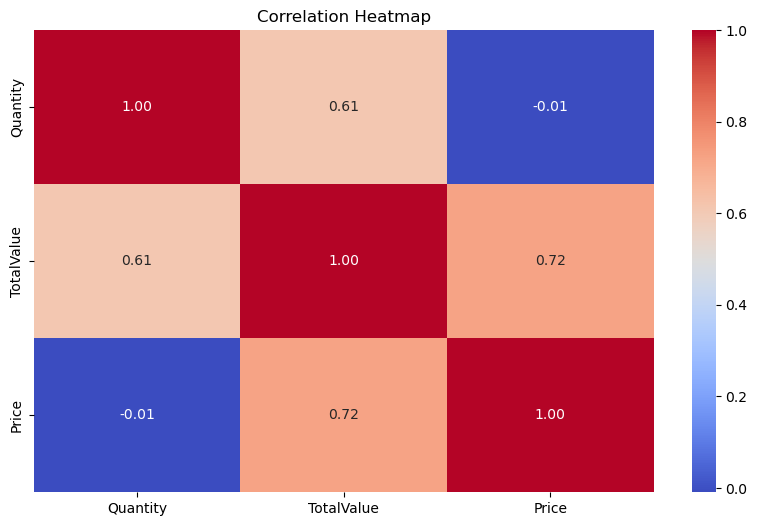

In [15]:
#correlation heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(customers_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

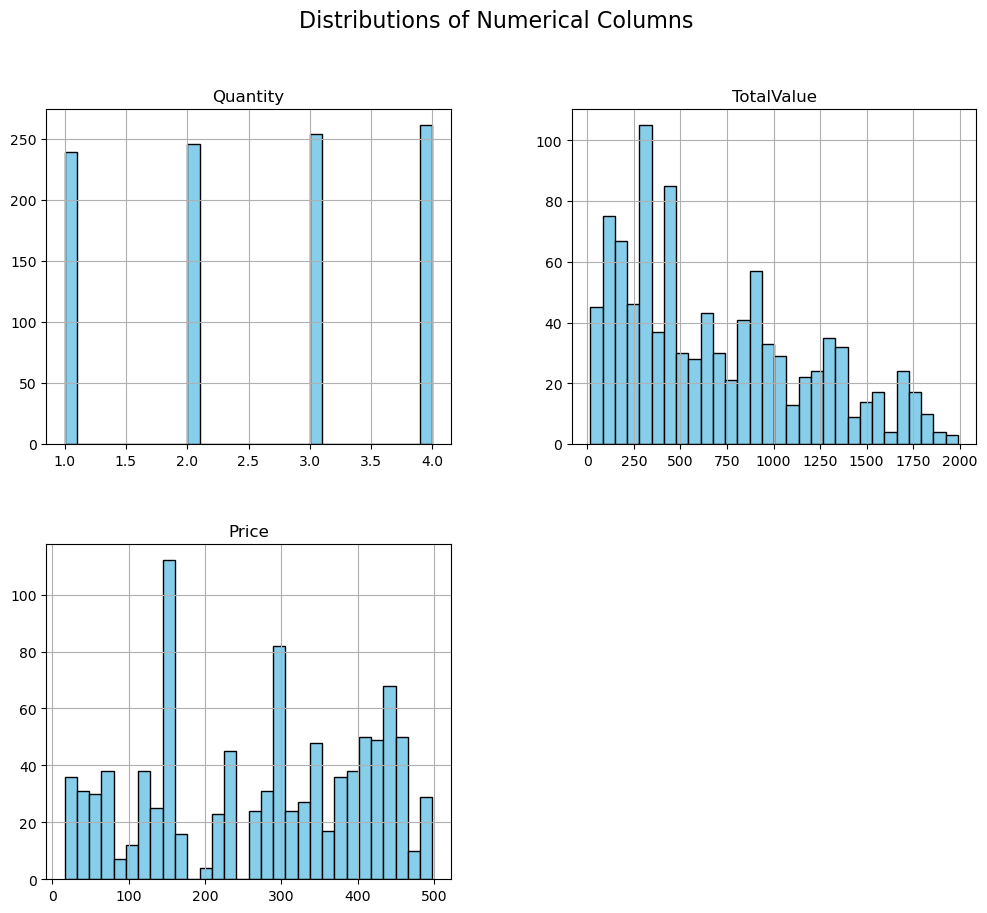

In [16]:
# Plot histograms for numerical columns
customers.select_dtypes(include=["int", "float"]).hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Columns", fontsize=16)
plt.show()


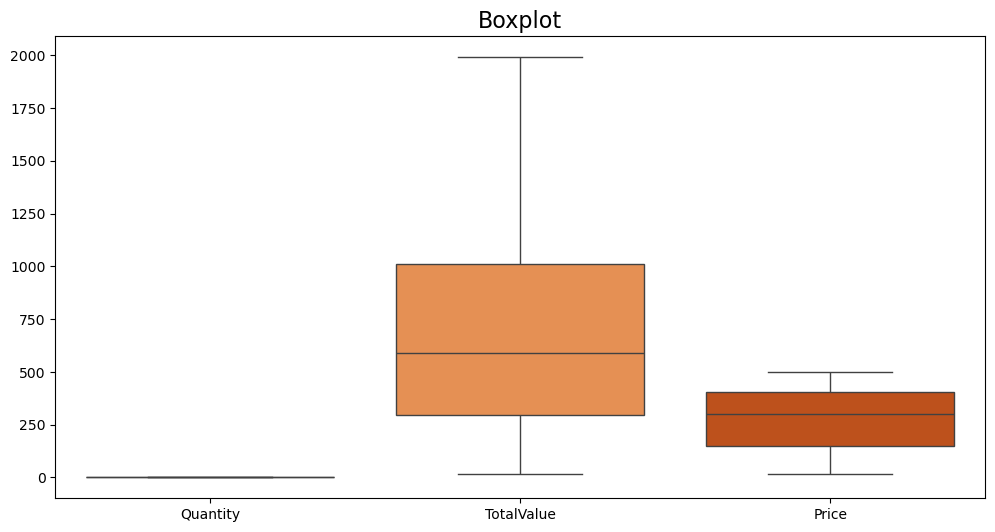

In [17]:
#Boxplot ,mainly it is used to check the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=customers.select_dtypes(include=["int", "float"]), palette="Oranges")
plt.title("Boxplot", fontsize=16)
plt.show()

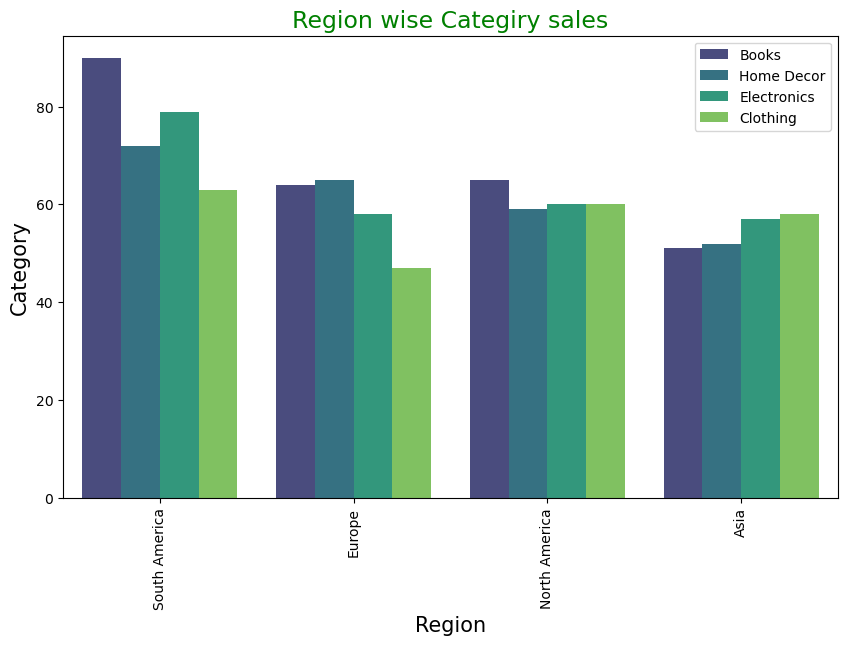

In [18]:
#here representing the data insights by category and region, by this data visulation its clear shown that which region has high sales and also category
plt.figure(figsize=(10------,6))
sns.countplot(x="Region",data=customers,hue="Category", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Category",fontsize=15)
plt.title("Region wise Categiry sales",fontsize=17,color="green")
plt.legend()
plt.show()

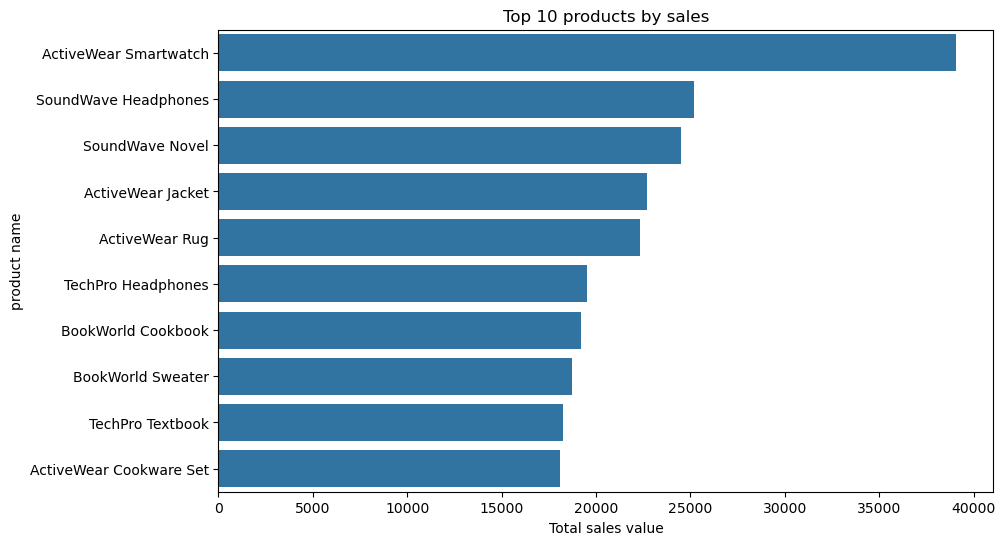

In [19]:
# Top 10 product names which are high sales
Product_sales=customers.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=Product_sales.values,y=Product_sales.index)
plt.title("Top 10 products by sales")
plt.xlabel("Total sales value")
plt.ylabel("product name")
plt.show()

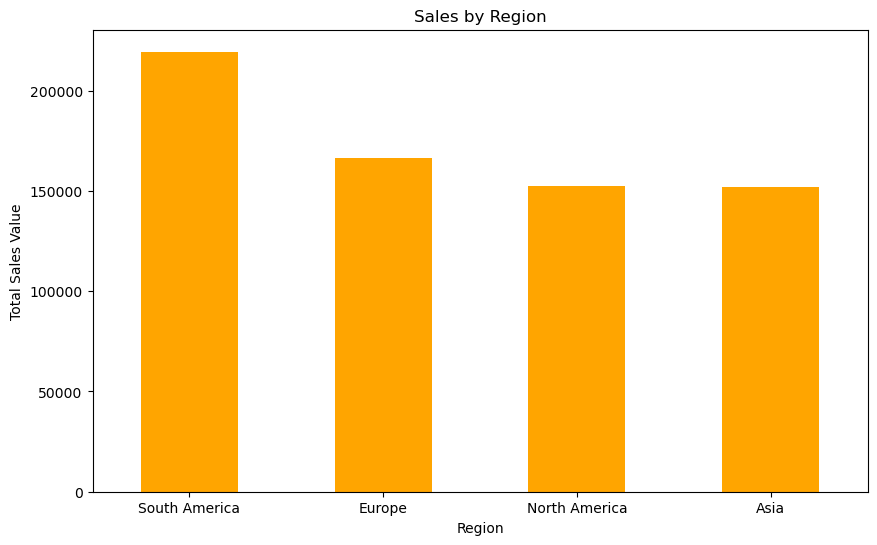

In [20]:
#highest sales value by  region wise
region_sales = customers.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind="bar", color="orange")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.ylabel("Total Sales Value")
plt.show()

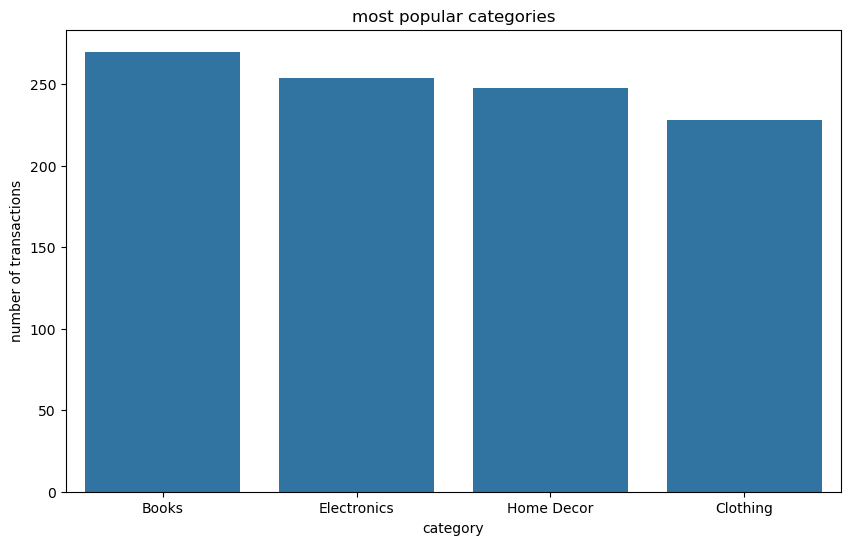

In [21]:
#most popular categories and their transactions accordingly
popular_cat=customers["Category"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=popular_cat.index,y=popular_cat.values)
plt.title("most popular categories")
plt.xlabel("category")
plt.ylabel("number of transactions")
plt.show()

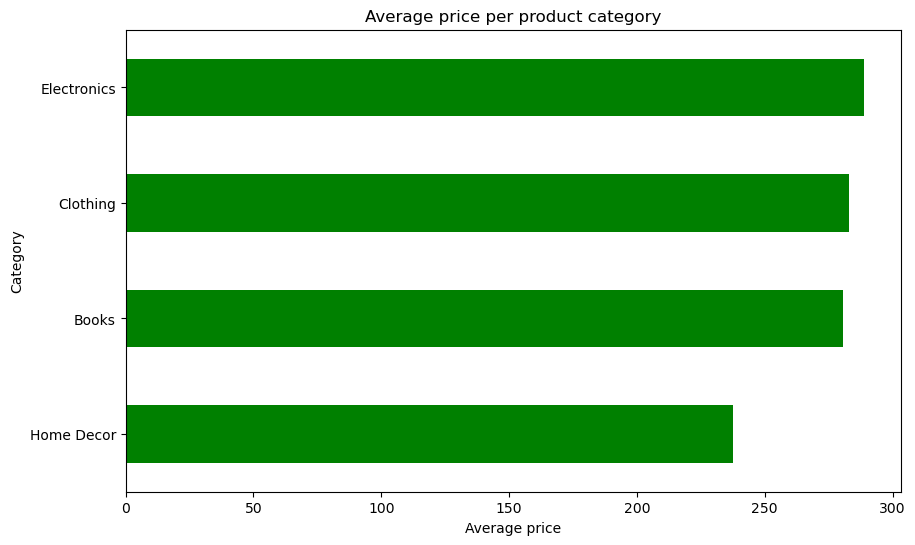

In [22]:
#average price per product category which is by category wise
avg_price_cat=customers.groupby("Category")["Price"].mean().sort_values()
plt.figure(figsize=(10,6))
avg_price_cat.plot(kind="barh",color="green")
plt.title("Average price per product category")
plt.xlabel("Average price")
plt.ylabel("Category")
plt.show()